In [1]:
# Using SARIMA for Time Series Forecasting
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

In [2]:
FILE_NAME = "dati_fco2004.csv"
series = read_csv(FILE_NAME, header=0, index_col = 0, parse_dates=True, squeeze=True)
series2014 = series[120:]

In [8]:
#
# finally I apply SARIMA to the last year, split train test and evaluate RMSE
#
warnings.filterwarnings("ignore") # specify to ignore warning messages

# the Time Series we want to forecast
X = series2014.values

# split train, test
LEN_TEST = 11
train, test = X[0:len(X) - LEN_TEST], X[len(X) - LEN_TEST:]

# walk-forward validation
# it is fundamental to specify the two parms enforce_!!!!....
# to avoid execution errors

def single_sarima(p, d, q, P, D, Q): 
    my_order = (p,d,q)
    # m, the period is fixed to 12 (12 steps in one year)
    m = 12
    my_seasonal_order = (P,D,Q,m)

    # in every iteration reset
    history = [x for x in train]
    predictions = list()

    for t in range(len(test)):
      # print("Iteration n. %d" % iter)
      model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, 
                  enforce_stationarity=False, 
                  enforce_invertibility=False)
      model_fit = model.fit(disp=0)
      # walk forward
      output = model_fit.forecast()
      predictions.append(output[0])
      # obs = test[t]
      history.append(test[t])
      
      # print('predicted=%.0f, expected=%.0f' % (output[0], test[t]))

    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    
    return rmse


#
# main, evaluation of hyper-parameters on grid
#
best_rmse = 3000000
par_best = []

iteraz = 1

for p in range(1, 3):
    for d in range(0, 3):
        for q in range(0, 2):
            for P in range(1, 2):
                for D in range(0,1):
                    for Q in range(0,2):
                        print("Iteration n. %d" % iteraz)
                        
                        # for some combinations it is is possible an exception... simply skip
                        try:
                            out_rmse = single_sarima(p,d,q,P,D,Q)
                            
                            if out_rmse < best_rmse:
                                best_rmse = out_rmse
                                par_best = [p, d, q, P, D, Q]
                                
                                print("Best so far: RMSE %d" % best_rmse)
                                
                            # print('Test RMSE: p= %d ,d= %d ,q= %d ,P= %d ,D= %d  %.0f' % (p, d, q, P, D, out_rmse))
                        except Exception as e:
                            pass
                            # print("Exception... ignore !")  
                        iteraz+= 1
print("")
print("Elaboration ended!")
print("Best RMSE: %.0f" % best_rmse)
print("Best paramaters: p= %d ,d= %d ,q= %d ,P= %d ,D= %d, Q= %d" % (par_best[0], par_best[1], par_best[2], par_best[3],
                                                             par_best[4], par_best[5]))

Iteration n. 1
Best so far: RMSE 75268
Iteration n. 2
Iteration n. 3
Iteration n. 4
Iteration n. 5
Best so far: RMSE 69983
Iteration n. 6
Iteration n. 7
Iteration n. 8
Iteration n. 9
Best so far: RMSE 55012
Iteration n. 10
Iteration n. 11
Iteration n. 12
Iteration n. 13
Iteration n. 14
Iteration n. 15
Iteration n. 16
Iteration n. 17
Iteration n. 18
Iteration n. 19
Iteration n. 20
Iteration n. 21
Iteration n. 22
Iteration n. 23
Iteration n. 24

Elaboration ended!
Best RMSE: 55013
Best paramaters: p= 1 ,d= 2 ,q= 0 ,P= 1 ,D= 0, Q= 0


In [9]:
## analisi primo periodo (2004 - 2009)

In [20]:
# dati di 5 anni, gli ultimi 2 uilizzati per testare accuratezza
series2004 = series[:60]

In [21]:
# the Time Series we want to forecast
X = series2004.values

# split train, test
LEN_TEST = 24
train, test = X[0:len(X) - LEN_TEST], X[len(X) - LEN_TEST:]

In [22]:
#
# main, evaluation of hyper-parameters on grid
#
best_rmse = 3000000
par_best = []

iteraz = 1

for p in range(0, 3):
    for d in range(0, 3):
        for q in range(0, 2):
            for P in range(0, 3):
                for D in range(0,3):
                    for Q in range(0,2):
                        print("Iteration n. %d" % iteraz)
                        
                        # for some combinations it is is possible an exception... simply skip
                        try:
                            out_rmse = single_sarima(p,d,q,P,D,Q)
                            
                            if out_rmse < best_rmse:
                                best_rmse = out_rmse
                                par_best = [p, d, q, P, D, Q]
                                
                                print("Best so far: RMSE %d" % best_rmse)
                                
                            # print('Test RMSE: p= %d ,d= %d ,q= %d ,P= %d ,D= %d  %.0f' % (p, d, q, P, D, out_rmse))
                        except Exception as e:
                            pass
                            # print("Exception... ignore !")  
                        iteraz+= 1
print("")
print("Elaboration ended!")
print("Best RMSE: %.0f" % best_rmse)
print("Best paramaters: p= %d ,d= %d ,q= %d ,P= %d ,D= %d, Q= %d" % (par_best[0], par_best[1], par_best[2], par_best[3],
                                                             par_best[4], par_best[5]))

Iteration n. 1
Best so far: RMSE 2885235
Iteration n. 2
Iteration n. 3
Best so far: RMSE 259779
Iteration n. 4
Iteration n. 5
Best so far: RMSE 178521
Iteration n. 6
Iteration n. 7
Best so far: RMSE 165179
Iteration n. 8
Iteration n. 9
Iteration n. 10
Iteration n. 11
Iteration n. 12
Iteration n. 13
Best so far: RMSE 155576
Iteration n. 14
Iteration n. 15
Iteration n. 16
Iteration n. 17
Iteration n. 18
Iteration n. 19
Iteration n. 20
Iteration n. 21
Iteration n. 22
Iteration n. 23
Best so far: RMSE 129579
Iteration n. 24
Iteration n. 25
Iteration n. 26
Iteration n. 27
Iteration n. 28
Iteration n. 29
Iteration n. 30
Iteration n. 31
Iteration n. 32
Iteration n. 33
Iteration n. 34
Iteration n. 35
Iteration n. 36
Iteration n. 37
Iteration n. 38
Iteration n. 39
Best so far: RMSE 100006
Iteration n. 40
Iteration n. 41
Iteration n. 42
Iteration n. 43
Best so far: RMSE 98199
Iteration n. 44
Iteration n. 45
Iteration n. 46
Iteration n. 47
Iteration n. 48
Iteration n. 49
Best so far: RMSE 90053
I

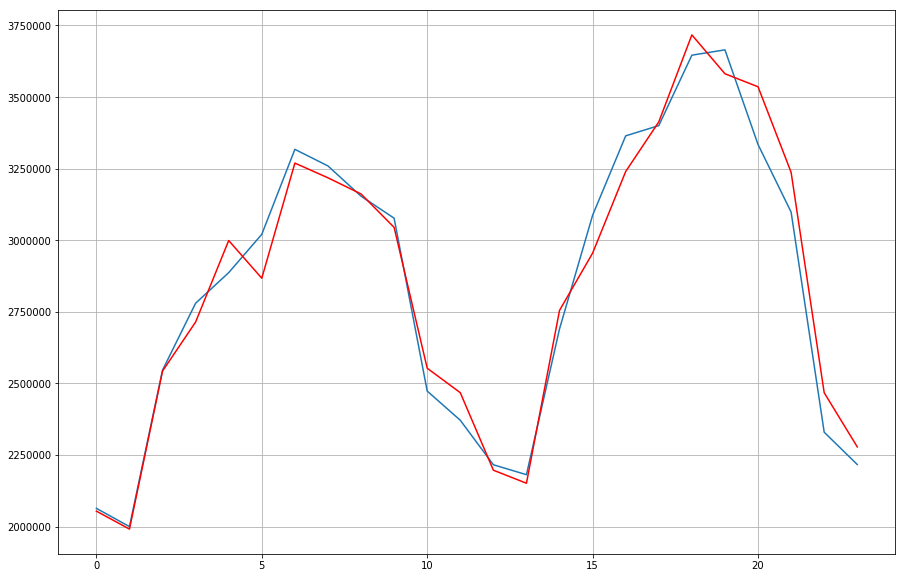

In [23]:
# per fare il grafico più grande
pyplot.rcParams['figure.figsize'] = [15, 10]

my_order = (0,1,0)
# m, the period is fixed to 12
my_seasonal_order = (2,0,0,12)

# in every iteration reset
history = [x for x in train]
predictions = list()

for t in range(len(test)):
      # print("Iteration n. %d" % iter)
      model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, 
                  enforce_stationarity=False, 
                  enforce_invertibility=False)
      model_fit = model.fit(disp=0)
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      history.append(obs)

pyplot.plot(test)
pyplot.grid()
pyplot.plot(predictions, color='red') 
pyplot.show()